[View in Colaboratory](https://colab.research.google.com/github/You-Your-Yu/machine-learning-assignment/blob/master/Shimosaka_fin_1515309_problem3.ipynb)

# Problem 3

## Dataset 2

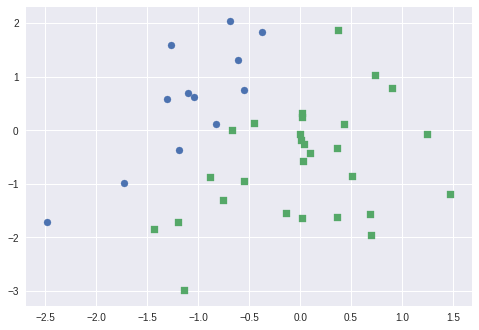

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def create_dataset2(n=40, bias=False,  sd=100):
    np.random.seed(sd)
    omega = np.random.randn(1, 1)
    noise = 0.8 * np.random.randn(n, 1)
    # x: n*2行列
    X = np.random.randn(n, 2)
    # y: n*1行列
    y = 2 * ((omega * X[:,0] + X[:,1] + noise) > 0).all(axis=0) -1
    if bias:
      X = np.c_[X, np.ones(len(X))]
    return X, y

### visualization ###
X, y = create_dataset2()
X_p = X[y == 1]
X_n = X[y == -1]
plt.scatter(X_p[:,0], X_p[:,1], marker='o')
plt.scatter(X_n[:,0], X_n[:,1], marker='s')
plt.show()

## Learning

In [2]:
import numpy as np

# loss function
def loss(w, X, y, lm=0.1):
  tmp = 1 -  np.dot(y[:, np.newaxis]  * X, w)
  tmp = np.clip(tmp, a_min=0, a_max=np.inf)
  return np.sum(tmp, axis=0)

# negative dual lagrange function
def ndl(alpha, K, lm=0.1):
  return np.dot(np.dot(alpha.T, K), alpha) / 4 / lm - np.dot(alpha.T, np.ones(alpha.shape[0]))

# differntiation of negative dual lagrange function
def dndl(alpha, K, lm=0.1):
  return np.dot(K, alpha) / 2 / lm  - 1    

# differentiation of negative dual lagrange function by learning rate
def dndl_by_lr(lr, alpha, K, lm=0.1):
  dndl_curr = dndl(alpha, K, lm)
  return 2 * lr * np.dot(dndl_curr, dndl_curr) - 2 * np.dot(dndl_curr.T, np.dot(K, alpha))
  
# update alpha by using projected gradient
def update(prev, K, lm=0.1, lr_init=1, c=0.5, rho=0.5):
  lr = lr_init
  while True:
    curr = prev - lr * dndl(prev, K, lm)
    curr[curr < 0] = 0
    curr[1 < curr] = 1
    ndl_curr = ndl(curr, K, lm)
    ndl_prev = ndl(prev, K, lm)
    dndl_by_lr_prev = dndl_by_lr(0, prev, K, lm) 
    condition = (ndl_curr <= (ndl_prev + c * lr * dndl_by_lr_prev))
    if condition:
      break
    else:
      lr *= rho
      curr = prev
  return curr
  
  
### preparing dataset ###
n = 40
bias = True
train_X, train_y = create_dataset2(n, bias, sd=100)
train_K = np.diag(train_y).dot(train_X).dot(train_X.T).dot(np.diag(train_y))
test_X, test_y = create_dataset2(n, bias, sd=200)
test_K = np.diag(test_y).dot(test_X).dot(test_X.T).dot(np.diag(test_y))
print('train_X: {}, train_y: {}'.format(train_X.shape, train_y.shape))
print('train_K: {}'.format(train_K.shape))
print('test_X: {}, test_y: {}'.format(test_X.shape, test_y.shape))
print('test_K: {}'.format(test_K.shape))
print('\n')

### training ###
alpha = 0.5 * np.random.rand(train_X.shape[0]) + 0.5
lm = 0.1
lr_init = 0.1
fin = 0.0001
log = []
prev = alpha
log.append(alpha)
while True:
  curr = update(prev, train_K, lm, lr_init)
  log.append(curr)
  if (np.linalg.norm(curr - prev) < fin).all():
    break
  prev = curr

### result ###
last = log[-1]
w = train_X.T.dot(np.diag(train_y)).dot(last)
print('total steps: {}'.format(len(log) - 1))
print('train_dl: {:.2f}, train_loss: {:.2f}'.format(-ndl(last, train_K, lm), loss(w, train_X, train_y, lm)))
print('test_dl: {:.2f}, test_loss: {:.2f}'.format(-ndl(last, test_K, lm), loss(w, test_X, test_y, lm)))
train_pred = (np.dot(train_X, w) >= 0) * 2 - 1
train_acc = np.sum(train_pred == train_y, axis=0) / len(train_y)
test_pred = (np.dot(test_X, w) >= 0) * 2 - 1
test_acc = np.sum(test_pred == test_y, axis=0) / len(test_y)
print('tarin_accracy: {:.3f}, test_accuracy: {:.3f}'.format(train_acc, test_acc))
print('\n')
'''
for i, item in enumerate(log):
  w_i = np.dot(train_y[np.newaxis, :] * train_X.T, item)
  l = loss(w_i, train_X, train_y, lm)
  print('step={}'.format(i))
  print('train_ndl: {:.4f}, train_loss: {:.4f}'.format(ndl(item, train_K, lm), loss(w_i, train_X, train_y, lm)))
  print('test_ndl: {:.4f}, test_loss: {:.4f}'.format(ndl(item, test_K, lm), loss(w_i, test_X, test_y, lm)))
  print(item)
 
'''
print('alpha: {}\nw: {}'.format(last, w))

train_X: (40, 3), train_y: (40,)
train_K: (40, 40)
test_X: (40, 3), test_y: (40,)
test_K: (40, 40)


total steps: 5
train_dl: -18.61, train_loss: 4.59
test_dl: -117.78, test_loss: 11.53
tarin_accracy: 1.000, test_accuracy: 0.875


alpha: [0.74579641 0.2299321  0.53709479 0.         0.         0.07809427
 0.73230274 0.         0.         0.57642548 0.30734598 0.
 0.1416354  0.46398976 0.44663202 0.         0.         0.52713208
 0.13903416 0.54646167 0.         0.22549605 0.         0.
 0.30503669 0.70885887 0.07878323 0.29003126 0.26911248 0.31246856
 0.32032363 0.         0.59672003 0.41796688 0.15215578 0.
 0.67047041 0.         0.         0.        ]
w: [-2.52113657  1.03072391 -1.98867046]


## Visualization

### Decision boundary

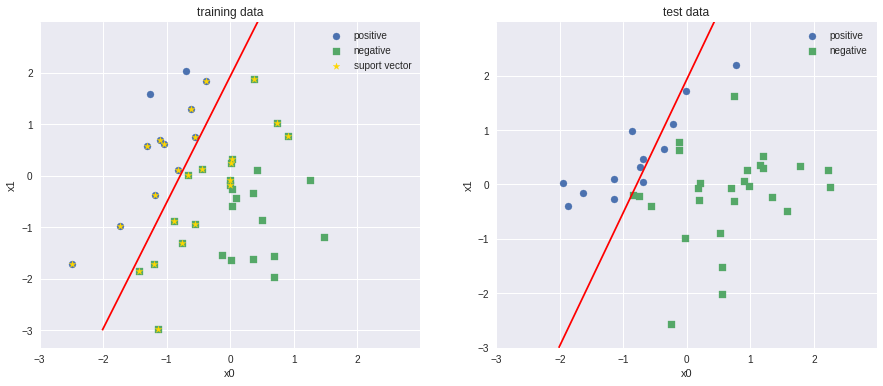

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig, (axL, axR) = plt.subplots(ncols=2, figsize=(15, 6))

train_X_p = train_X[train_y == 1]
train_X_n = train_X[train_y == -1]
test_X_p = test_X[test_y == 1]
test_X_n = test_X[test_y == -1]

sv = train_X[last.astype(bool)]

x0range = np.arange(-3, 3, 0.01)
x1range = np.arange(-3, 3, 0.01)
X0, X1 = np.meshgrid(x0range, x1range)
Y = X0 * w[0] + X1 * w[1]
if bias:
  Y += w[2]
axL.set_title('training data')
axL.set_xlabel('x0')
axL.set_ylabel('x1')
axL.contour(X0, X1, Y, [0], colors='red')
axL.scatter(train_X_p[:,0], train_X_p[:,1], marker='o', label='positive')
axL.scatter(train_X_n[:,0], train_X_n[:,1], marker='s', label='negative')
axL.scatter(sv[:,0], sv[:,1], marker='*', color='gold', label='suport vector')
axL.legend()

axR.set_title('test data')
axR.set_xlabel('x0')
axR.set_ylabel('x1')
axR.contour(X0, X1, Y, [0], colors='red')
axR.scatter(test_X_p[:,0], test_X_p[:,1], marker='o', label='positive')
axR.scatter(test_X_n[:,0], test_X_n[:,1], marker='s', label='negative')
axR.legend()

plt.show()

### History of loss

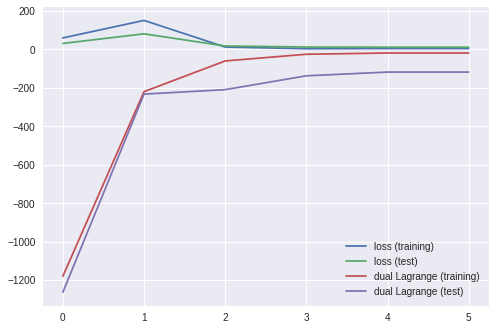

In [8]:
import numpy as np
import matplotlib.pyplot as plt

log_alpha = log
log_w = [train_X.T.dot(np.diag(train_y)).dot(item) for item in log_alpha]

train_loss = [loss(item, train_X, train_y, lm) for item in log_w]
test_loss = [loss(item, test_X, test_y, lm) for item in log_w]
train_dl = [-ndl(item, train_K, lm) for item in log_alpha]
test_dl = [-ndl(item, test_K, lm) for item in log_alpha]

step = np.arange(len(log_alpha))
plt.plot(step, train_loss, label='loss (training)')
plt.plot(step, test_loss, label='loss (test)')
plt.plot(step, train_dl, label='dual Lagrange (training)')
plt.plot(step, test_dl, label='dual Lagrange (test)')
plt.legend()

plt.show()